**Blatt 2**

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# Definiere die Integrationsmethoden
def integral_l_rectangle(function, start, end, n):
    h = (end - start) / n
    x_rectangle = np.linspace(start, end - h, n)
    return np.sum(function(x_rectangle) * h)

def integral_midpoint(function, start, end, n):
    h = (end - start) / n
    x_midpoint = np.linspace(start + h / 2, end - h / 2, n)
    return np.sum(function(x_midpoint) * h)

def integral_simpson(function, start, end, n):

    n = n*2                             # n mal zwei um die zwei subintervalle zu erhalten

    h = (end - start) / n
    x = np.linspace(start, end, n+1)
    fx = function(x)
    
    integral = fx[0] + fx[-1]
    integral += 4 * np.sum(fx[1:-1:2])  # Punkte an ungeraden Stellen
    integral += 2 * np.sum(fx[2:-2:2])  # Punkte an geraden Stellen
    
    return (h / 3) * integral

f = lambda x: np.cos(x)*np.exp(np.sin(x))

print(integral_l_rectangle(f, 0, 3, 20))
print(integral_midpoint(f, 0, 3, 20))
print(integral_simpson(f, 0, 3, 20))


0.31200300631103906
0.15159389745706867
0.15156263622055932


Um das genaugkeits aufwand Diagramm zu erstellen wird erst die analytische Lösung der Funktion berechnet. Diese ist gegeben durch:

\begin{equation}
    \int_0^3{cos(x)\cdot e^{sin(x)}} = e^{sin(3)} -1
\end{equation}

Anschließend wird der Aufwand und der Fehler geplottet

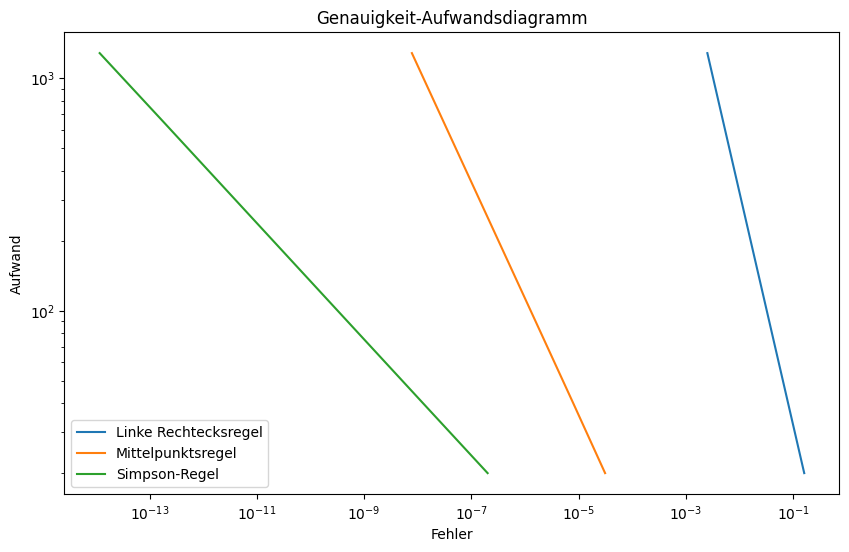

In [31]:
# Analytischer Wert des Integrals
analytical_value = np.exp(np.sin(3)) - 1

# Verschiedene Werte für N
n_vals = np.array([20, 40, 80, 160, 320, 640, 1280])

# Leere Listen für Fehlerwerte
error_lr = np.zeros(len(n_vals))
error_mr = np.zeros(len(n_vals))
error_sr = np.zeros(len(n_vals))
computation_cost = n_vals * 1  # Beispielaufwand, bei N = 1 eine Berechnung pro Teilintervall

# Berechne Fehler für jede Methode
for i in range(len(n_vals)):
    error_lr[i] = abs(integral_l_rectangle(f, 0, 3, n_vals[i]) - analytical_value)
    error_mr[i] = abs(integral_midpoint(f, 0, 3, n_vals[i]) - analytical_value)
    error_sr[i] = abs(integral_simpson(f, 0, 3, n_vals[i]) - analytical_value)

# Plotten der Fehler gegen den Rechenaufwand
plt.figure(figsize=(10, 6))
plt.loglog(error_lr, computation_cost, label='Linke Rechtecksregel')
plt.loglog(error_mr, computation_cost, label='Mittelpunktsregel')
plt.loglog(error_sr, computation_cost, label='Simpson-Regel')

# Diagramm-Details
plt.title('Genauigkeit-Aufwandsdiagramm')
plt.xlabel('Fehler')
plt.ylabel('Aufwand')
plt.legend()
plt.show()
